In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# read the songs_df file
songs_df = pd.read_csv('songs_with_audio_features_final.csv')
songs_df.dropna(subset=['valence'], inplace=True)

# Plotting the dataset

We used James A. Russell's Circumplex Model of Affect to analyze songs. This model uses two main metrics: valence (how positive or negative an emotion is) and arousal (how energetic or calm it is). We applied it to songs using valence and energy data from Spotify, where valence (0 to 1) indicates how positive a song is, and energy (also 0 to 1) serves as a substitute for arousal to show how energetic a song is. Using these metrics, we plotted each song on a map with four quadrants. This plot visually categorizes songs into areas such as high valence and high energy (happy and energetic songs), or low valence and low energy (sad and calm songs), helping us understand the emotional character of each song in our dataset.

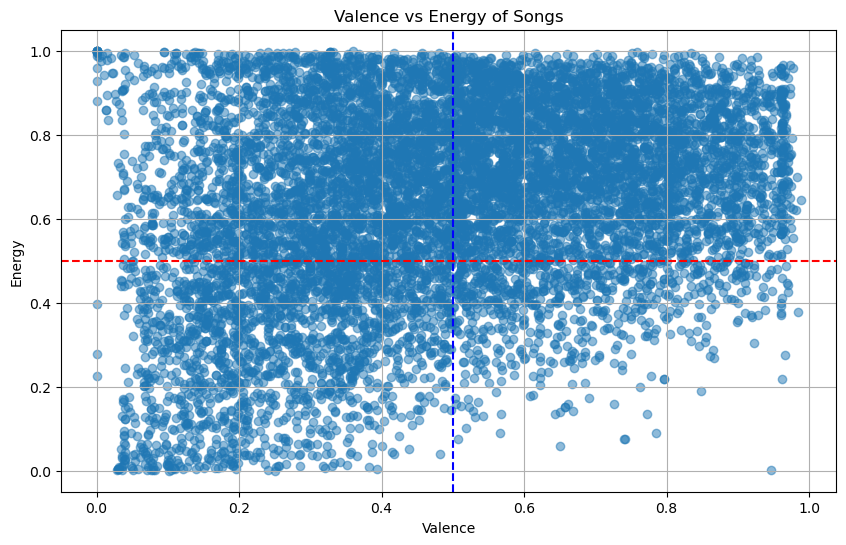

In [39]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(songs_df['valence'], songs_df['energy'], alpha=0.5)

# Add reference lines at x=0.5 and y=0.5
plt.axhline(0.5, color='red', linestyle='--', label='y = 0.5')
plt.axvline(0.5, color='blue', linestyle='--', label='x = 0.5')
    
plt.title('Valence vs Energy of Songs')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# Performing Clustering

To further explore this dataset, which includes song characteristics like valence and energy, we decided to run a few clustering algorithms. Based on valence and energy and the model of emotions, our songs are already categorized into 4 quadrants (happy, angry, sad, relaxed). But, is it possible to identify the same groups of data using a clustering method? Or will the clustering result in a different categorization?

To find out the answer, we used 3 different clustering algorithms: hierarchical clustering, k-means clustering and dbscan.

In [40]:
def hierarchical_clustering(n_clusters):
    # Read data
    points = list(zip(songs_df['valence'], songs_df['energy']))
    
    # Convert the list of points to a NumPy array
    points = np.array(points)
    
    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(points)

    # Visualize the clusters
    plt.scatter(points[:, 0], points[:, 1], c=clustering.labels_, cmap='rainbow')
    plt.axhline(0.5, color='red', linestyle='--', label='y = 0.5')
    plt.axvline(0.5, color='blue', linestyle='--', label='x = 0.5')
    plt.title('Hierarchical Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()
    
def kmeans_clustering(n_clusters):
    # Read data
    points = list(zip(songs_df['valence'], songs_df['energy']))
    
    # Convert the list of points to a NumPy array
    points = np.array(points)
    
    # Perform k-Means clustering
    kmeans = KMeans(n_clusters=n_clusters).fit(points)

    # Visualize the clusters
    plt.scatter(points[:, 0], points[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
    plt.axhline(0.5, color='red', linestyle='--', label='y = 0.5')
    plt.axvline(0.5, color='blue', linestyle='--', label='x = 0.5')
    plt.title('k-Means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def dbscan_clustering(eps, min_samples):
    # Read data
    points = list(zip(songs_df['valence'], songs_df['energy']))
    
    # Convert the list of points to a NumPy array
    points = np.array(points)
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(points)

    # Visualize the clusters (assuming -1 represents noise points)
    plt.scatter(points[:, 0], points[:, 1], c=dbscan.labels_, cmap='rainbow')
    plt.axhline(0.5, color='red', linestyle='--', label='y = 0.5')
    plt.axvline(0.5, color='blue', linestyle='--', label='x = 0.5')
    plt.title('DBSCAN Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.show()

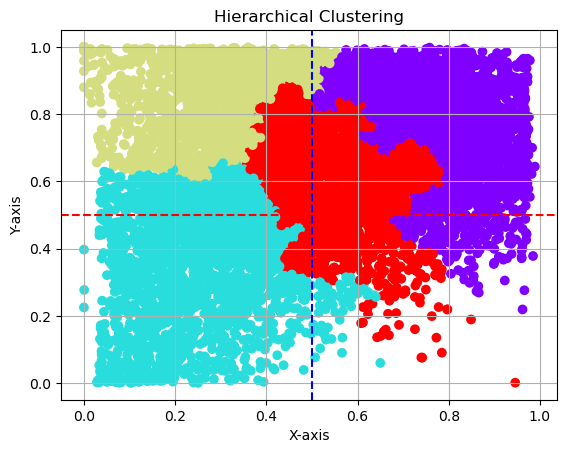

In [41]:
num_clusters_hierarchical = 4
hierarchical_clustering(num_clusters_hierarchical)

C:\Users\frena\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


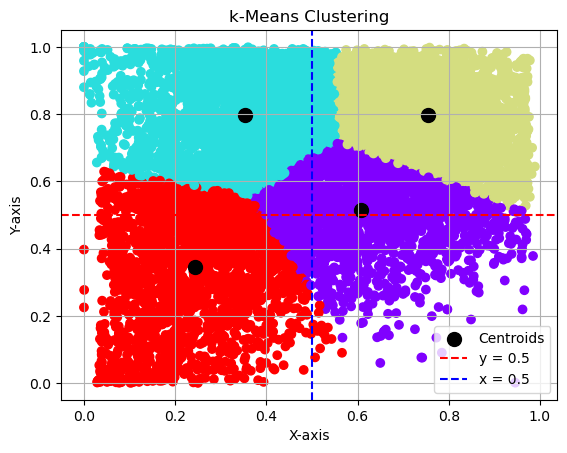

In [42]:
num_clusters_kmeans = 4
kmeans_clustering(num_clusters_kmeans)

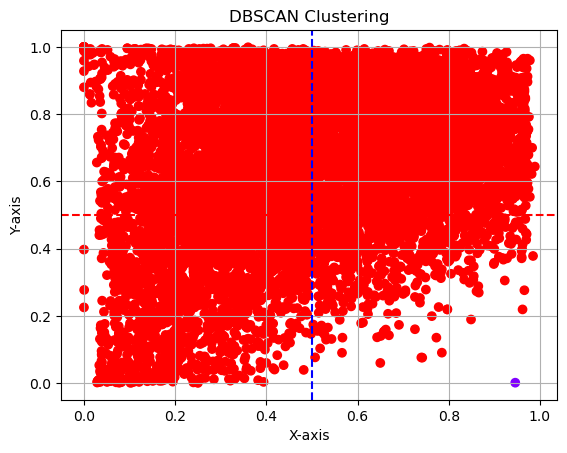

In [43]:
eps_dbscan = 0.1
min_samples_dbscan = 4
dbscan_clustering(eps_dbscan, min_samples_dbscan)      

Based on the results, it can be observed that the clusters vaguely match the quadrants after a small change of place of the axis. The mismatch might suggest that there is significant overlap between our categories. For instance, some songs might exhibit qualities of both 'happy' and 'relaxed' or 'angry' and 'sad', making them difficult to categorize distinctly.